# Pymaceuticals Inc.
---

### Analysis

Based on the data analysis performed during this activity, the weight of the trial mouse is positively correlated to it's average tumor size over the course of it's drug regimen. Additionally, the Capomulin treatment has proven that it can reduce the tumor size in these trials.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = study_results.merge(mouse_metadata,on="Mouse ID")

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
len(combine_data["Mouse ID"].unique())

249

In [5]:
#Find duplicate rows
duplicate = combine_data[combine_data.duplicated(['Mouse ID','Timepoint'],keep = False)]
duplicate['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = combine_data.drop(combine_data[combine_data['Mouse ID'] == 'g989'].index)
    

new_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(new_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_group = new_data.groupby(['Drug Regimen'],as_index = True)
sum_table = pd.DataFrame({'Mean Volume':mouse_group['Tumor Volume (mm3)'].mean(),'Median Volume':mouse_group['Tumor Volume (mm3)'].median(),
                         'Volume Variance':mouse_group['Tumor Volume (mm3)'].var(),'Volume Std Deviation':mouse_group['Tumor Volume (mm3)'].std(),
                         'Volume Std Error':mouse_group['Tumor Volume (mm3)'].sem()})
sum_table

,Mean Volume,Median Volume,Volume Variance,Volume Std Deviation,Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

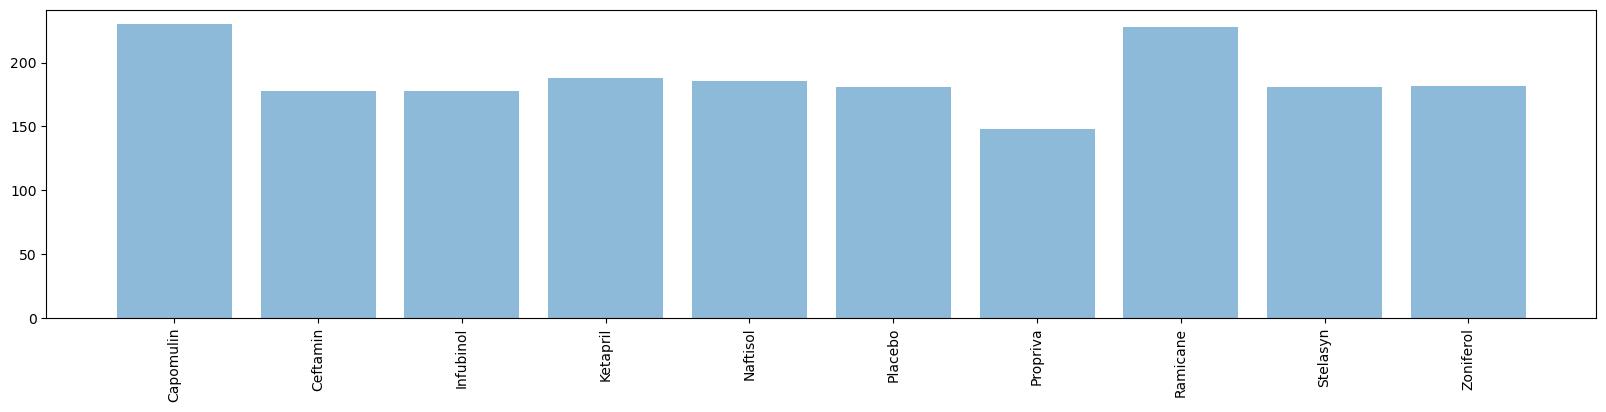

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(sum_table))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, mouse_group.size(), alpha = 0.5, align='edge')
plt.xticks(tick_locations, sum_table.index, rotation = 'vertical')
plt.show()


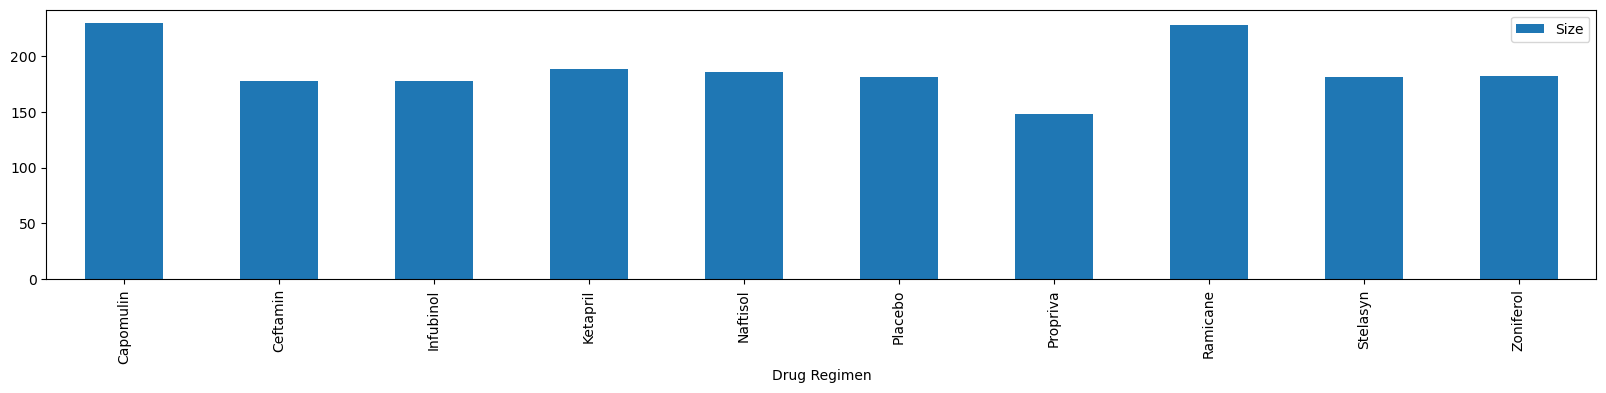

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas.
Regimen_and_count = pd.DataFrame({'Size':mouse_group.size()})
Regimen_and_count.plot(kind = "bar", figsize=(20,3.5))
plt.show()

<Axes: ylabel='Mouse ID'>

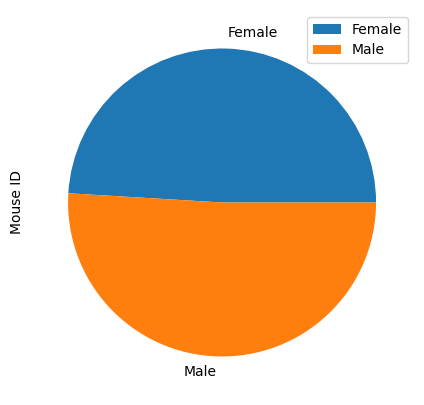

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_Division = new_data.groupby(['Sex'],as_index = True).count()
Gender_Division.plot(kind = "pie", figsize = (5,5), y = 'Mouse ID')

<function matplotlib.pyplot.show(close=None, block=None)>

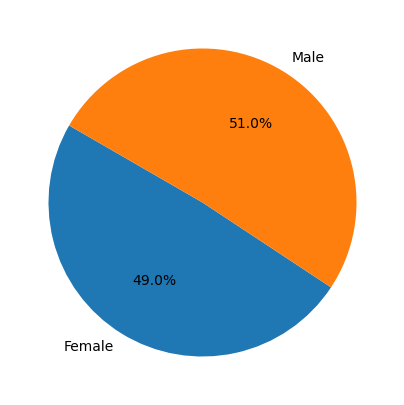

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
plt.figure(figsize = (5,5))

plt.pie(counts,labels = labels, autopct = "%1.1f%%",startangle = 150)

plt.show


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(new_data.groupby(["Mouse ID"])["Timepoint"].max())


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = max_tp.merge(new_data, how = 'inner', on = ["Mouse ID", "Timepoint"])
final_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
treatment_tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    d = final_data.loc[final_data['Drug Regimen'] == drug]
    
    # add subset 
    treatment_tumorvol.append(d['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = d['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The interquartile range of tumor size for {drug} is: {iqr}, with values below {lower_bound} or above {upper_bound} potentially being outliers.")

The interquartile range of tumor size for Capomulin is: 7.781863460000004, with values below 20.70456164999999 or above 51.83201549 potentially being outliers.
The interquartile range of tumor size for Ceftamin is: 15.577752179999997, with values below 25.355449580000002 or above 87.66645829999999 potentially being outliers.
The interquartile range of tumor size for Infubinol is: 11.477135160000003, with values below 36.83290494999999 or above 82.74144559000001 potentially being outliers.
The interquartile range of tumor size for Ramicane is: 9.098536719999998, with values below 17.912664470000003 or above 54.30681135 potentially being outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

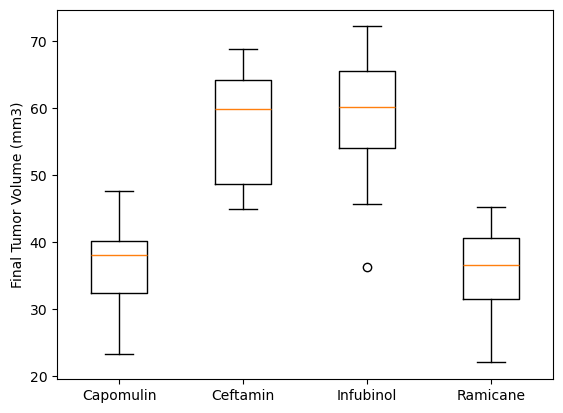

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(treatment_tumorvol)
plt.xticks([1,2,3,4],labels = treatments)
plt.show

## Line and Scatter Plots

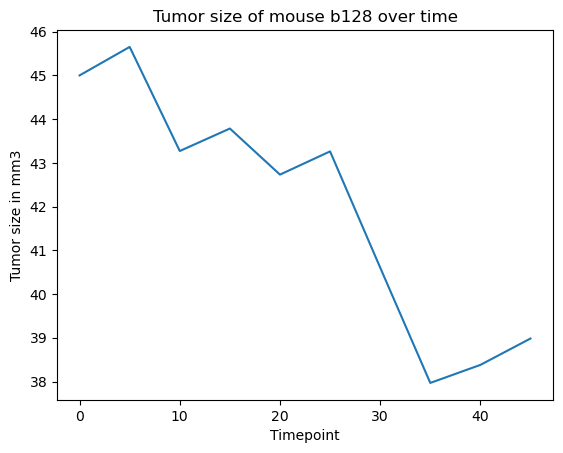

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

sample_mouse = new_data.loc[new_data['Mouse ID'] == 'b128']
plt.title('Tumor size of mouse b128 over time')
plt.ylabel('Tumor size in mm3')
plt.xlabel('Timepoint')
plt.plot(sample_mouse['Timepoint'],sample_mouse['Tumor Volume (mm3)'])
plt.show()

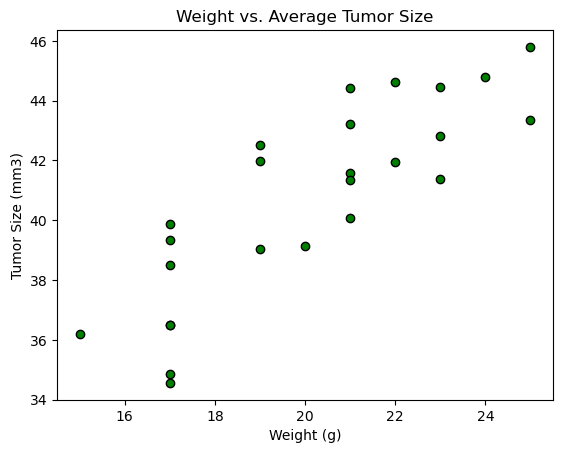

In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = new_data.loc[new_data['Drug Regimen'] == 'Capomulin']
weight_data = capomulin_data.groupby(['Mouse ID'], as_index = False)['Weight (g)'].mean()
tumor_data = capomulin_data.groupby(['Mouse ID'], as_index = False)['Tumor Volume (mm3)'].mean()
scatter_data = weight_data.merge(tumor_data, how = 'inner', on = 'Mouse ID')
plt.scatter(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'], marker = "o", facecolors = "green", edgecolors = "black")
plt.title("Weight vs. Average Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.show()


## Correlation and Regression

In [92]:
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


The correlation between weight and average tumor size during the Capomulin regimen is 0.53


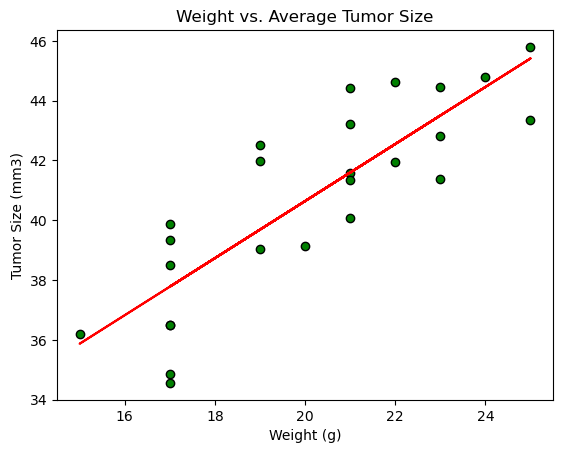

In [99]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_data.iloc[:,7]
tumor = capomulin_data.iloc[:,2]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between weight and average tumor size during the Capomulin regimen is {round(correlation[0],2)}")

weight_data = capomulin_data.groupby(['Mouse ID'], as_index = False)['Weight (g)'].mean()
tumor_data = capomulin_data.groupby(['Mouse ID'], as_index = False)['Tumor Volume (mm3)'].mean()
scatter_data = weight_data.merge(tumor_data, how = 'inner', on = 'Mouse ID')

x_values = scatter_data['Weight (g)']
y_values = scatter_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker = "o", facecolors = "green", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.title("Weight vs. Average Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.show()